# 21기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("BlackFriday.csv", index_col = 0)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


## 1. Preprocssing / EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22589 entries, 1000001 to 1003539
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_ID                  22589 non-null  object 
 1   Gender                      22589 non-null  object 
 2   Age                         22589 non-null  object 
 3   Occupation                  22588 non-null  float64
 4   City_Category               22588 non-null  object 
 5   Stay_In_Current_City_Years  22588 non-null  object 
 6   Marital_Status              22588 non-null  float64
 7   Product_Category_1          22588 non-null  float64
 8   Product_Category_2          15374 non-null  float64
 9   Product_Category_3          6786 non-null   float64
 10  Purchase                    22588 non-null  float64
dtypes: float64(6), object(5)
memory usage: 2.1+ MB


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,112936.000000,112936.000000,112936.000000,77794.000000,34540.000000,112935.000000
mean,8.093699,0.408683,5.294822,9.855079,12.658975,9303.174543
std,6.522573,0.491593,3.740002,5.085552,4.123074,4973.375291
min,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5855.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12056.000000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


Product_ID                        0
Gender                            0
Age                               0
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2             7215
Product_Category_3            15803
Purchase                          1
dtype: int64


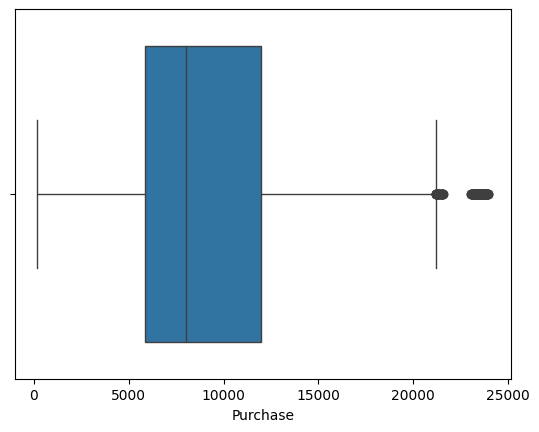

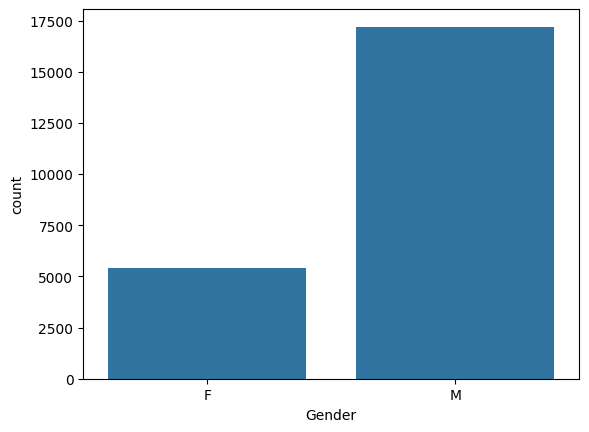

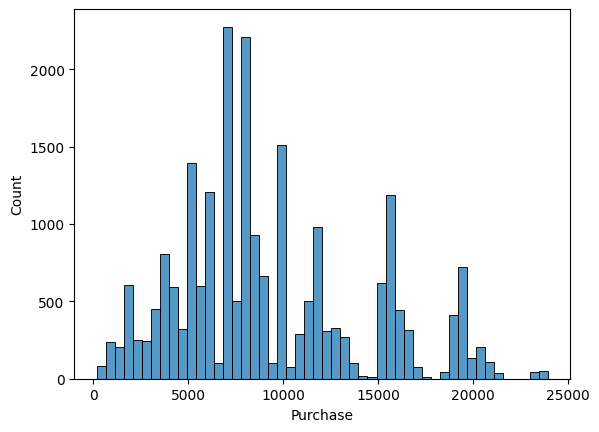

<ipython-input-4-88a22df5f928>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


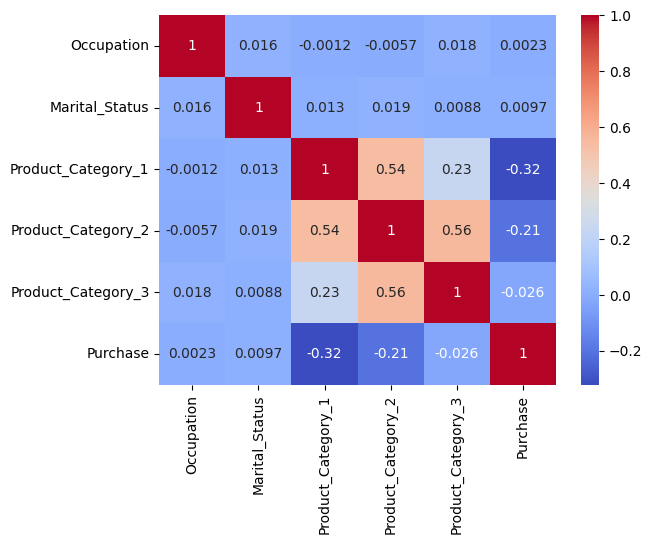

<ipython-input-4-88a22df5f928>:36: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


  Product_ID   Age  Occupation City_Category Stay_In_Current_City_Years  \
0  P00069042  0-17        10.0             A                          2   
1  P00248942  0-17        10.0             A                          2   
2  P00087842  0-17        10.0             A                          2   
3  P00085442  0-17        10.0             A                          2   
4  P00285442   55+        16.0             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0             0.0                 3.0            9.865032            12.73578   
1             0.0                 1.0            6.000000            14.00000   
2             0.0                12.0            9.865032            12.73578   
3             0.0                12.0           14.000000            12.73578   
4             0.0                 8.0            9.865032            12.73578   

   Purchase  Gender_F  Gender_M  
0 -0.165415         1       

In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
# 여기서는 'data.csv'라는 이름의 파일을 불러옵니다. 실제 파일의 이름과 경로에 맞게 수정해주세요.

# 기본 통계 정보 확인


# 결측치 확인
print(df.isnull().sum())
df = df.reset_index(drop=True)

# 이상치 확인
# 박스플롯을 그려보겠습니다. 여기서는 'Purchase' 컬럼을 예시로 들었습니다.
sns.boxplot(x=df['Purchase'])
plt.show()

# 범주형 변수의 분포 확인
sns.countplot(x='Gender', data=df)
plt.show()

# 수치형 변수의 분포 확인
sns.histplot(df['Purchase'], bins=50)
plt.show()

# 변수 간 상관관계 분석
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 결측치 처리
# 여기서는 평균값으로 대체하는 방법을 사용합니다.
df.fillna(df.mean(), inplace=True)

# 이상치 처리
# 이상치를 제거하는 방법을 사용하겠습니다.
# IQR을 이용해서 Purchase 컬럼의 이상치를 제거해보겠습니다.
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Purchase'] < (Q1 - 1.5 * IQR)) |(df['Purchase'] > (Q3 + 1.5 * IQR)))]

# 범주형 변수 인코딩
# 성별(Gender) 컬럼을 예시로 들었습니다.
df = pd.get_dummies(df, columns=['Gender'])

# 데이터 스케일링
# StandardScaler를 이용해서 Purchase 컬럼을 스케일링 해보겠습니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Purchase'] = scaler.fit_transform(df[['Purchase']])

# 결과 확인
print(df.head())


## 2. KNN 구현 & 파라미터 튜닝

In [9]:
# 'Purchase' 변수를 범주형으로 변환
df['Purchase'] = pd.qcut(df['Purchase'], q=4, labels=False)

# 데이터 타입 확인
print(df['Purchase'].dtype)


int64


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 타겟 변수 설정 (여기서는 'Purchase'를 타겟으로 설정하였습니다)
target = 'Purchase'
X = df.drop(target, axis=1)
y = df[target]

# 'Purchase' 변수를 범주형으로 변환
df['Purchase'] = pd.qcut(df['Purchase'], q=4, labels=False)

# 범주형 변수를 숫자로 변환
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# KNN 모델 초기화
knn = KNeighborsClassifier()

# GridSearchCV를 이용한 하이퍼파라미터 튜닝
params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, params, cv=5)
grid_knn.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyper Parameters:", grid_knn.best_params_)

# 최적의 하이퍼파라미터를 사용한 모델 학습
knn_best = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'],
                                weights=grid_knn.best_params_['weights'])
knn_best.fit(X_train, y_train)

# 테스트 데이터에 대한 예측값 계산
y_pred = knn_best.predict(X_test)

# 성능 평가
print(classification_report(y_test, y_pred))


Best Hyper Parameters: {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1112
           1       0.39      0.40      0.39      1121
           2       0.38      0.32      0.35      1136
           3       0.64      0.72      0.68      1126

    accuracy                           0.49      4495
   macro avg       0.48      0.49      0.48      4495
weighted avg       0.48      0.49      0.48      4495



## 3. Evaluation

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# 테스트 데이터에 대한 예측값 계산
y_pred = knn_best.predict(X_test)

# confusion matrix 출력
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# classification report 출력
print('Classification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[559 333 134  86]
 [312 447 277  85]
 [173 321 363 279]
 [ 82  46 183 815]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1112
           1       0.39      0.40      0.39      1121
           2       0.38      0.32      0.35      1136
           3       0.64      0.72      0.68      1126

    accuracy                           0.49      4495
   macro avg       0.48      0.49      0.48      4495
weighted avg       0.48      0.49      0.48      4495

